In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.preprocessing import image
from google.colab import drive
import matplotlib.pyplot as plt
import os
import numpy as np

Link data gambar: https://drive.google.com/drive/folders/11PYPzvOnwF15HRsRfSoyV0UOyxJ9yN1-?usp=share_link

In [ ]:
# connect to Gdrive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/Dataset\ Deep \Learning/Tugas-VGG16/

/content/gdrive/MyDrive/Dataset Deep Learning/Tugas-VGG16


In [ ]:
%ls

Data-Testing/  Data-Training/  Images-To-Predict/  Trained-Model/


In [ ]:
# Load Model
vgg16_model = load_model('Trained-Model/best_model.h5')

In [ ]:
# Load Image
def load_image(image_path):
  img = Image.open(image_path)
  return img

In [ ]:
# Image Preprocessing
def image_preprocessing(image_path):
  img = load_image(image_path)
  img = img.resize((224,224))
  
  image_array = image.img_to_array(img)
  image_array = tf.expand_dims(image_array, axis=0)
  
  return image_array

In [ ]:
images_list = []
images = os.listdir("Images-To-Predict")
for img in images:
  images_list.append(os.path.join("Images-To-Predict", img))

1/1 [==============================] - 0s 446ms/step


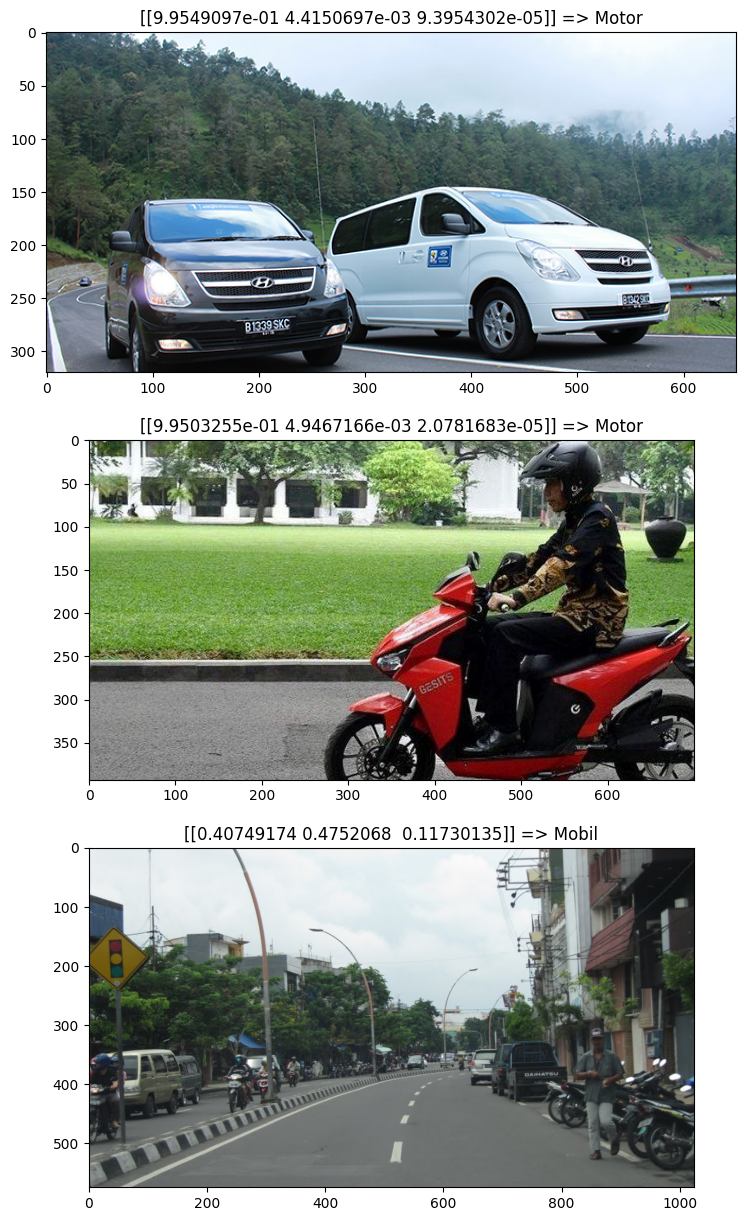

In [31]:
image_count = 0
fig, axs = plt.subplots(3, 1, figsize=(30, 15))

for image_path in images_list:
  image_to_predict = image_preprocessing(image_path)

  img = load_image(image_path)
  img = np.asarray(img)

  prediction = vgg16_model.predict(image_to_predict)
  predicted_class = ""
  if prediction[0][0] > prediction[0][1] and prediction[0][0] > prediction[0][2]:
      predicted_class = "Motor"
  elif prediction[0][1] > prediction[0][0] and prediction[0][1] > prediction[0][2]:
      predicted_class = "Mobil"
  else:
      predicted_class = "Non-Vehicles"

  img_title = f"{prediction} => {predicted_class}"
  axs[image_count].imshow(img)
  axs[image_count].set_title(img_title)
  image_count += 1

plt.show()